<a href="https://colab.research.google.com/github/Sampriti347/Thyroid-Cancer/blob/main/thyroid_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os,sys
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/thyroid_cancer')
sys.path.append('/content/gdrive/MyDrive/thyroid_cancer')

Mounted at /content/drive


In [2]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.5 MB/s eta 0:00:00


In [3]:
!pip install --upgrade scikit-plot scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import feature_engine
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers.winsorizer import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost
from scipy.stats import norm


In [5]:
df = pd.read_csv("dataset.csv")
df.head(6)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No


In [6]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [7]:
df.shape

(383, 17)

In [8]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [9]:
df = df.replace(to_replace='F',value = 0)
df = df.replace(to_replace='M',value = 1)

<ipython-input-9-d7579330b916>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace='M',value = 1)


In [10]:

df = df.replace(to_replace='No',value = 0)
df = df.replace(to_replace='Yes',value = 1)


<ipython-input-10-b4af9c9b07fa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace='Yes',value = 1)


In [11]:
new_df=df.drop(['Recurred'],axis=1)

In [12]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,30,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,62,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,62,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
df_encoded.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Recurred',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_Posterior', 'Adenopathy_Right', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary', 'Focality_Uni-Focal',
       'Risk_Intermediate', 'Risk_Low', 'T_T1b', 'T_T2', 'T_T3a', 'T_T3b',
       'T_T4a', 'T_T4b', 'N_N1a', 'N_N1b', 'M_M1', 'Stage_II', 'Stage_III',
       'Stage_IVA', 'Stage_IVB', 'Response_Excellent',
       'Response_Indeterminate', 'Response_Structural Incomplete'],
      dtype=

In [14]:
# Re-identify categorical columns
#categorical_columns = df.select_dtypes(include=['object']).columns

# Applying binary encoding again
#binary_encoded_dfs = [binary_encode(col) for col in categorical_columns]
#df_binary_encoded = pd.concat([df.drop(columns=categorical_columns)] + binary_encoded_dfs, axis=1)

# Display the first few rows of the binary encoded dataset
#df_binary_encoded.head()


In [15]:
new_df = df_encoded.replace(to_replace='False',value = 0)
new_df = df_encoded.replace(to_replace='True',value = 1)


In [16]:
new_df.head(4)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,30,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,62,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
new_df.corr()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.258897,-0.023205,-0.028367,-0.085732,0.100209,...,-0.051278,0.075087,0.235401,0.369106,0.208210,0.141867,0.336617,-0.258453,0.055762,0.198518
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.328189,-0.047227,-0.050344,0.004327,0.086095,...,-0.031137,0.246946,0.211540,0.147333,0.083175,0.110044,0.159335,-0.263805,-0.005657,0.302000
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.333243,-0.024016,-0.010933,-0.044052,0.050354,...,-0.060961,0.220617,0.321233,0.195086,0.191325,0.231977,0.261746,-0.276350,-0.038540,0.318792
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.136073,0.007065,-0.126106,0.056064,0.105639,...,-0.026224,0.051487,0.127209,-0.012303,0.267138,0.088823,0.191920,-0.084694,-0.067416,0.102449
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,0.174407,-0.024539,-0.061267,-0.015693,-0.026577,...,-0.033683,0.104566,0.430214,0.029243,-0.014017,0.208984,0.443356,-0.109624,-0.059387,0.152818
Recurred,0.258897,0.328189,0.333243,0.136073,0.174407,1.000000,-0.046091,0.074827,-0.072075,0.032535,...,0.094672,0.605927,0.354360,0.335022,0.163932,0.141783,0.274397,-0.671568,-0.161760,0.863540
Thyroid Function_Clinical Hypothyroidism,-0.023205,-0.047227,-0.024016,0.007065,-0.024539,-0.046091,1.000000,-0.458868,-0.020684,-0.035031,...,0.020013,-0.066894,-0.039939,-0.054303,-0.018476,-0.015980,-0.030926,0.044619,0.003636,-0.065186
Thyroid Function_Euthyroid,-0.028367,-0.050344,-0.010933,-0.126106,-0.061267,0.074827,-0.458868,1.000000,-0.293443,-0.496975,...,-0.134440,0.078570,0.014411,0.007251,-0.110926,-0.139526,0.021384,-0.050955,-0.039426,0.074347
Thyroid Function_Subclinical Hyperthyroidism,-0.085732,0.004327,-0.044052,0.056064,-0.015693,-0.072075,-0.020684,-0.293443,1.000000,-0.022402,...,-0.028392,-0.065130,-0.025540,-0.034726,-0.011815,-0.010219,-0.019777,0.105494,-0.050058,-0.064205
Thyroid Function_Subclinical Hypothyroidism,0.100209,0.086095,0.050354,0.105639,-0.026577,0.032535,-0.035031,-0.496975,-0.022402,1.000000,...,0.131297,0.051933,0.022486,0.092026,0.253706,0.140516,-0.033495,-0.072706,0.067307,0.022021


In [18]:
new_df.dtypes


,0
Age,int64
Gender,int64
Smoking,int64
Hx Smoking,int64
Hx Radiothreapy,int64
Recurred,int64
Thyroid Function_Clinical Hypothyroidism,bool
Thyroid Function_Euthyroid,bool
Thyroid Function_Subclinical Hyperthyroidism,bool
Thyroid Function_Subclinical Hypothyroidism,bool


In [19]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender                                            383 non-null    int64
 2   Smoking                                           383 non-null    int64
 3   Hx Smoking                                        383 non-null    int64
 4   Hx Radiothreapy                                   383 non-null    int64
 5   Recurred                                          383 non-null    int64
 6   Thyroid Function_Clinical Hypothyroidism          383 non-null    bool 
 7   Thyroid Function_Euthyroid                        383 non-null    bool 
 8   Thyroid Function_Subclinical Hyperthyroidism      383 non-null    bool 
 9   Thyroid Function_Subclinical Hypothyroidism

In [20]:
new_df.describe()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.185379,0.127937,0.073107,0.018277,0.281984
std,15.134494,0.389113,0.334457,0.260653,0.134126,0.450554
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000


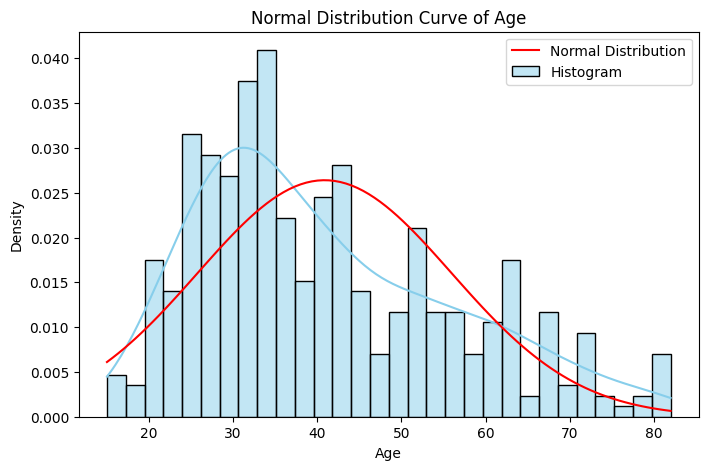

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the normal distribution curve for "Age"
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, stat="density", color="skyblue", label="Histogram")

# Overlay the normal distribution curve
mean_age = np.mean(df["Age"])
std_age = np.std(df["Age"])
x_values = np.linspace(min(df["Age"]), max(df["Age"]), 100)
y_values = norm.pdf(x_values, mean_age, std_age)
plt.plot(x_values, y_values, color="red", label="Normal Distribution")

# Labels and title
plt.title("Normal Distribution Curve of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


In [22]:
new_df['T_T1b'].dtypes

dtype('bool')

In [23]:
new_df['T_T1b'] = new_df['T_T1b'].astype(float)
new_df['T_T2'] = new_df['T_T2'].astype(float)
new_df['T_T3a'] = new_df['T_T3a'].astype(float)
new_df['T_T3b'] = new_df['T_T3b'].astype(float)
new_df['T_T4a'] = new_df['T_T4a'].astype(float)
new_df['T_T4b'] = new_df['T_T4b'].astype(float)

<ipython-input-24-01a342c1cb55>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
<ipython-input-24-01a342c1cb55>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
<ipython-input-24-01a342c1cb55>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in

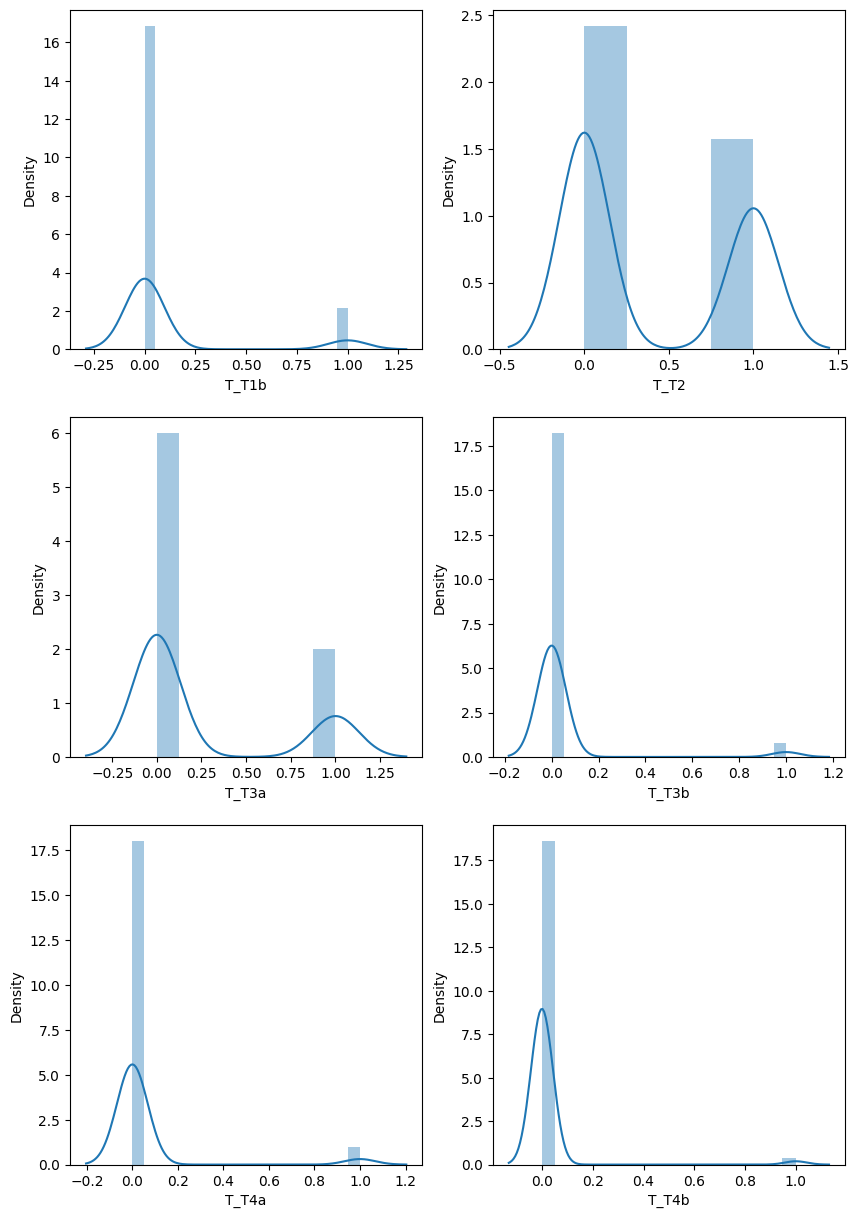

In [24]:
columns = ['T_T1b','T_T2','T_T3a','T_T3b','T_T4a','T_T4b']  # Changed 'T_3a' to 'T_T3a'
plt.figure(figsize= (10,15),facecolor = 'white')
plotnumber = 1
for col in columns:
  ax = plt.subplot(3,2,plotnumber)
  sns.distplot(new_df[col])
  plt.xlabel(col,fontsize = 10)
  plotnumber+=1
plt.show()

In [25]:
target = df['Recurred']

In [26]:
rdsample=RandomOverSampler()
target = df['Recurred']
x_sampled,y_sampled=rdsample.fit_resample(df,target)

<Axes: ylabel='count'>

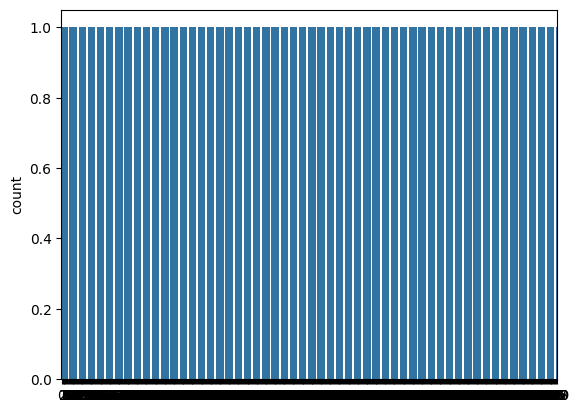

In [27]:
sns.countplot(y_sampled)


In [28]:
target.value_counts()


,count
Recurred,
0,275
1,108


In [78]:
x_sampled=new_df
x_sampled.head(3)



,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,34,0,0,1,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,30,0,0,0,0,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


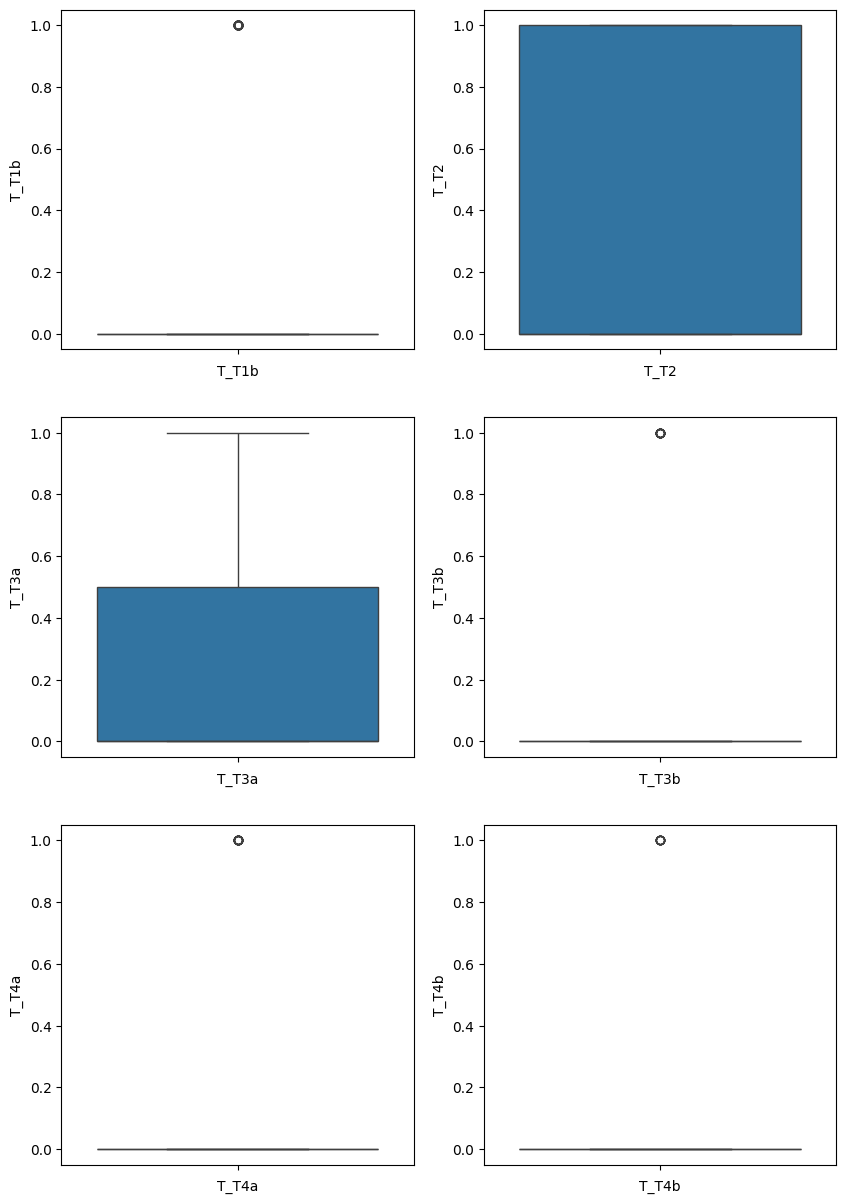

In [31]:
columns = ['T_T1b','T_T2','T_T3a','T_T3b','T_T4a','T_T4b']  # Changed 'T_3a' to 'T_T3a'
plt.figure(figsize= (10,15),facecolor = 'white')
plotnumber = 1
for col in columns:
  ax = plt.subplot(3,2,plotnumber)
  sns.boxplot(new_df[col])
  plt.xlabel(col,fontsize = 10)
  plotnumber+=1
plt.show()
#T_T1b, T_T3b,T_T4a,T_T4b has outliers so we have to remove it.

In [35]:
winsorizer=Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=['T_T4a'])
x_sampled['T_T4a']=winsorizer.fit_transform(x_sampled[['T_T4a']])
winsorizer=Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=['T_T1b'])
x_sampled['T_T1b']=winsorizer.fit_transform(x_sampled[['T_T1b']])
winsorizer=Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=['T_T4b'])
x_sampled['T_T4b']=winsorizer.fit_transform(x_sampled[['T_T4b']])
winsorizer=Winsorizer(capping_method='gaussian',tail='both',fold=1.5,variables=['T_T3b'])
x_sampled['T_T3b']=winsorizer.fit_transform(x_sampled[['T_T3b']])


In [39]:
# Convert all columns of x_sampled to numeric, coercing errors to NaN
for col in x_sampled.columns:
    x_sampled[col] = pd.to_numeric(x_sampled[col], errors='coerce')

# Impute NaN values if any (replace with mean, median, or other strategy)
imputer = SimpleImputer(strategy='mean') # Choose an appropriate strategy
x_sampled = pd.DataFrame(imputer.fit_transform(x_sampled), columns=x_sampled.columns)


def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(x_sampled)

,variables,VIF
0,Age,14.618290
1,Gender,2.326394
2,Smoking,2.604143
3,Hx Smoking,1.513784
4,Hx Radiothreapy,1.936078
5,Recurred,8.885628
6,Thyroid Function_Clinical Hypothyroidism,1.893348
7,Thyroid Function_Euthyroid,23.811943
8,Thyroid Function_Subclinical Hyperthyroidism,1.409991
9,Thyroid Function_Subclinical Hypothyroidism,2.134751


In [40]:
x_sampled.corr()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Recurred,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,N_N1a,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.258897,-0.023205,-0.028367,-0.085732,0.100209,...,-0.051278,0.075087,0.235401,0.369106,0.208210,0.141867,0.336617,-0.258453,0.055762,0.198518
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.328189,-0.047227,-0.050344,0.004327,0.086095,...,-0.031137,0.246946,0.211540,0.147333,0.083175,0.110044,0.159335,-0.263805,-0.005657,0.302000
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.333243,-0.024016,-0.010933,-0.044052,0.050354,...,-0.060961,0.220617,0.321233,0.195086,0.191325,0.231977,0.261746,-0.276350,-0.038540,0.318792
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.136073,0.007065,-0.126106,0.056064,0.105639,...,-0.026224,0.051487,0.127209,-0.012303,0.267138,0.088823,0.191920,-0.084694,-0.067416,0.102449
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,0.174407,-0.024539,-0.061267,-0.015693,-0.026577,...,-0.033683,0.104566,0.430214,0.029243,-0.014017,0.208984,0.443356,-0.109624,-0.059387,0.152818
Recurred,0.258897,0.328189,0.333243,0.136073,0.174407,1.000000,-0.046091,0.074827,-0.072075,0.032535,...,0.094672,0.605927,0.354360,0.335022,0.163932,0.141783,0.274397,-0.671568,-0.161760,0.863540
Thyroid Function_Clinical Hypothyroidism,-0.023205,-0.047227,-0.024016,0.007065,-0.024539,-0.046091,1.000000,-0.458868,-0.020684,-0.035031,...,0.020013,-0.066894,-0.039939,-0.054303,-0.018476,-0.015980,-0.030926,0.044619,0.003636,-0.065186
Thyroid Function_Euthyroid,-0.028367,-0.050344,-0.010933,-0.126106,-0.061267,0.074827,-0.458868,1.000000,-0.293443,-0.496975,...,-0.134440,0.078570,0.014411,0.007251,-0.110926,-0.139526,0.021384,-0.050955,-0.039426,0.074347
Thyroid Function_Subclinical Hyperthyroidism,-0.085732,0.004327,-0.044052,0.056064,-0.015693,-0.072075,-0.020684,-0.293443,1.000000,-0.022402,...,-0.028392,-0.065130,-0.025540,-0.034726,-0.011815,-0.010219,-0.019777,0.105494,-0.050058,-0.064205
Thyroid Function_Subclinical Hypothyroidism,0.100209,0.086095,0.050354,0.105639,-0.026577,0.032535,-0.035031,-0.496975,-0.022402,1.000000,...,0.131297,0.051933,0.022486,0.092026,0.253706,0.140516,-0.033495,-0.072706,0.067307,0.022021


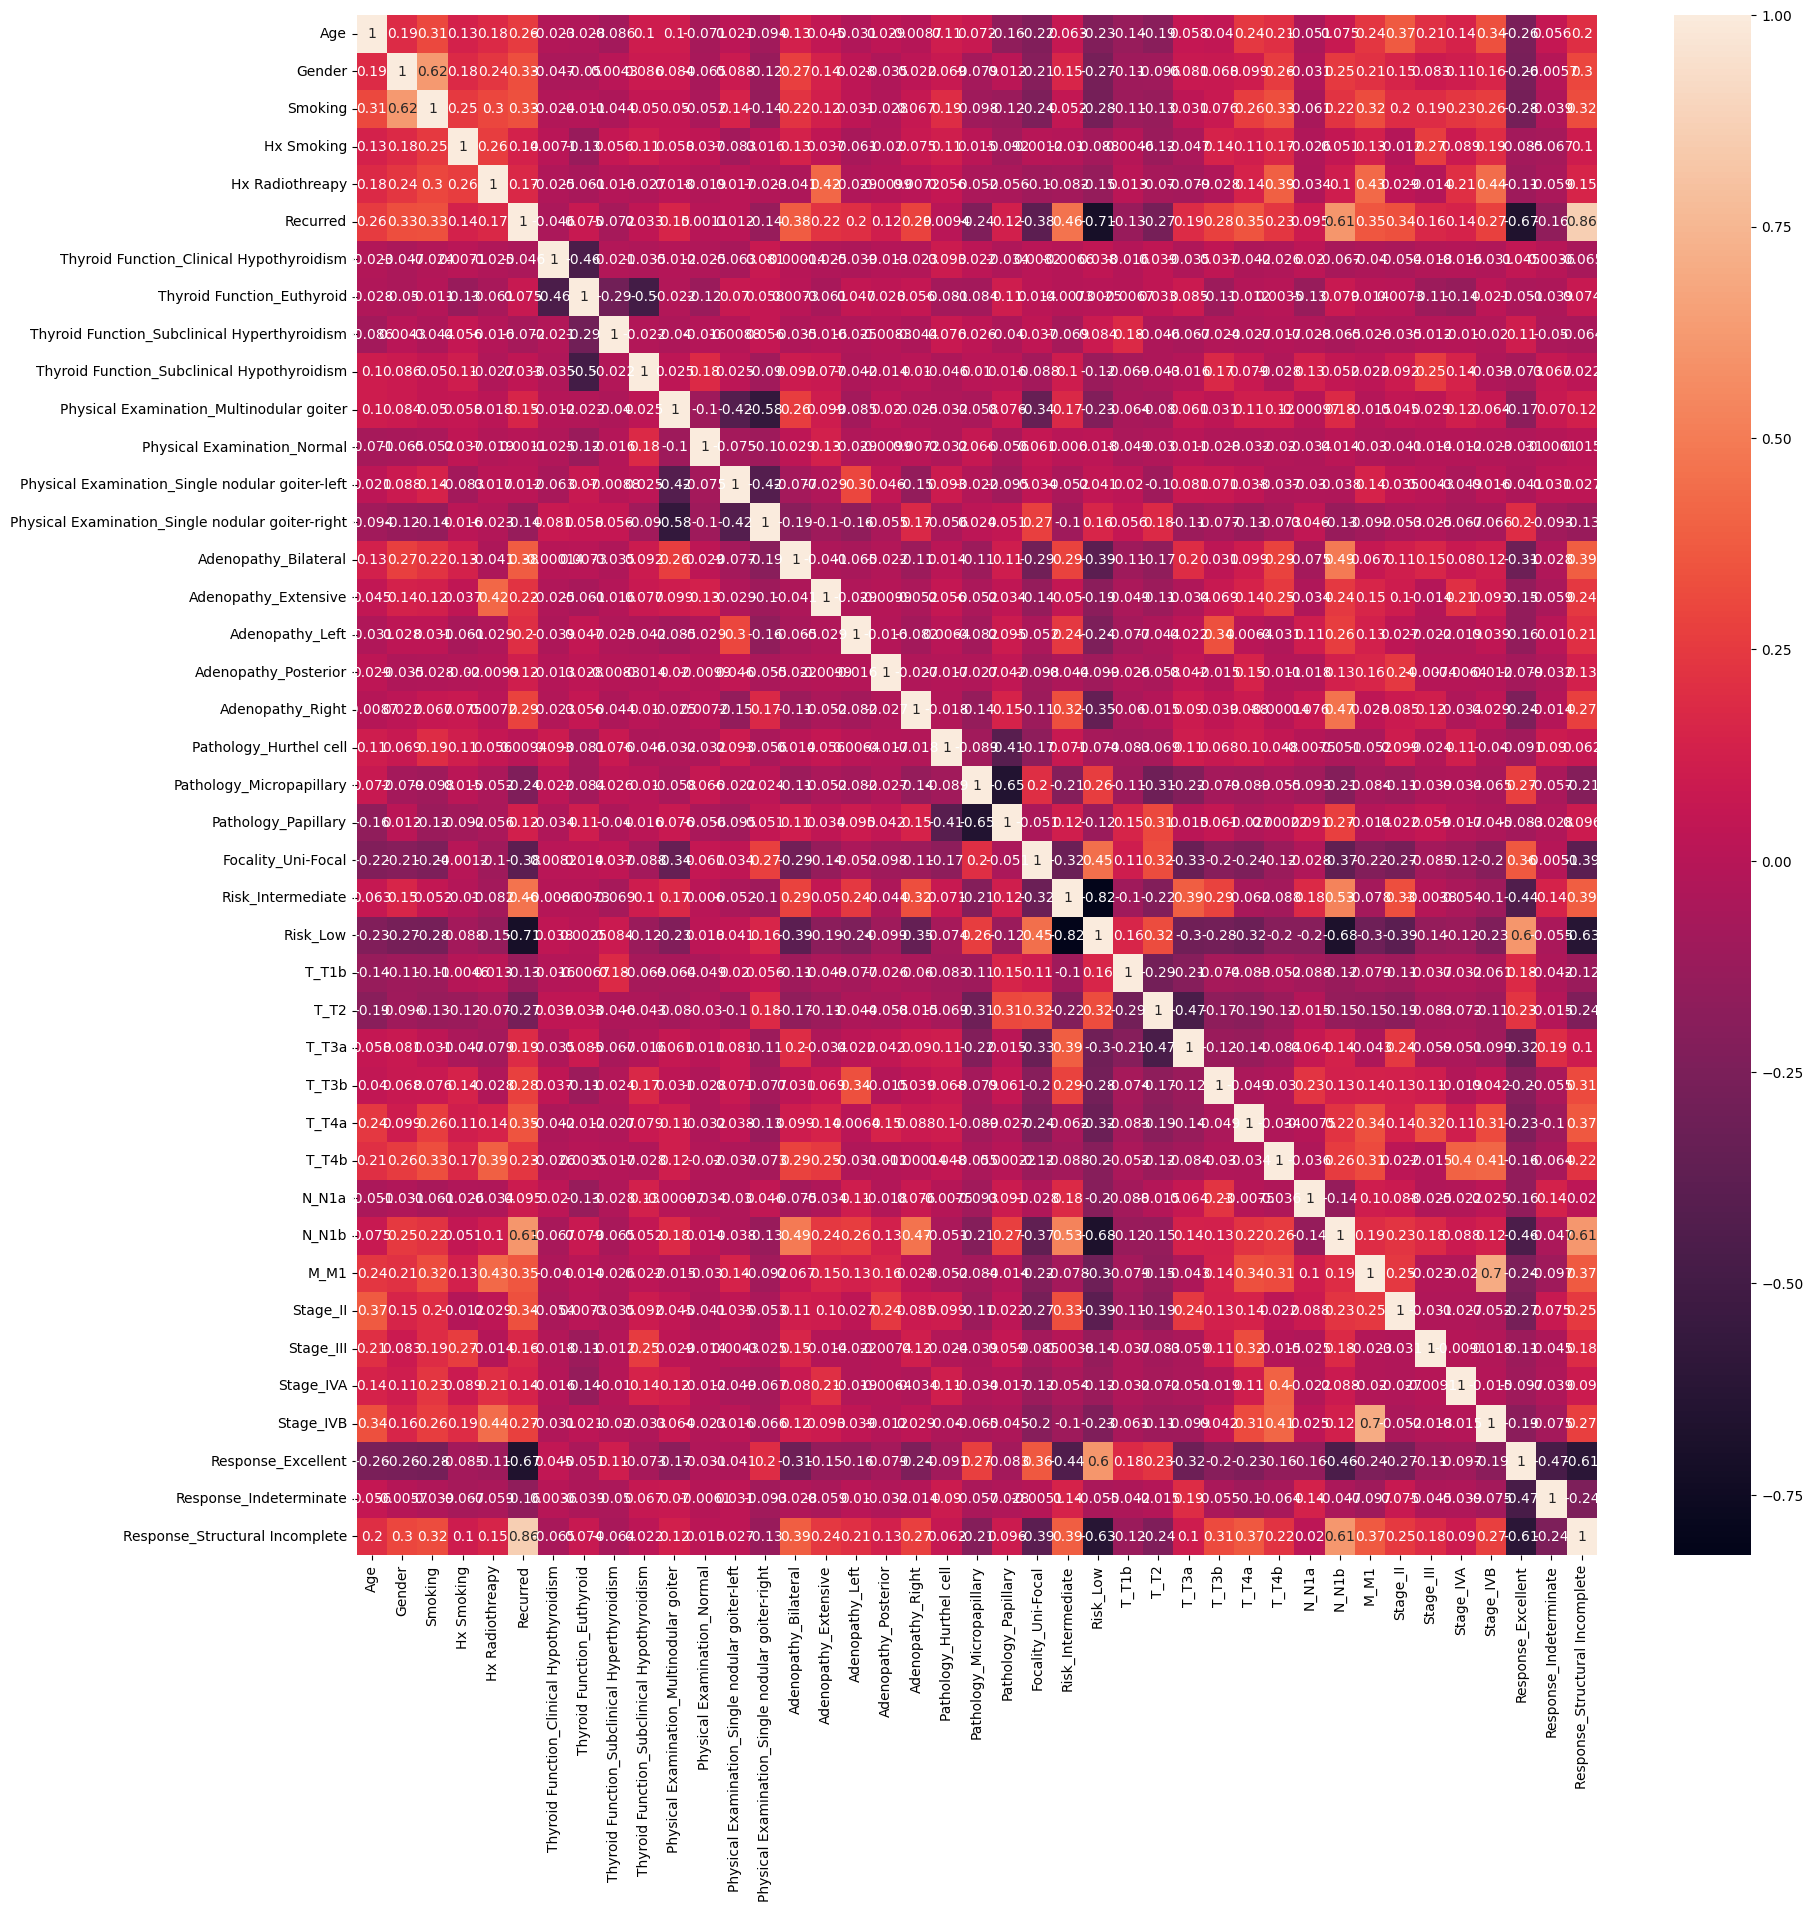

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(data=x_sampled.corr(),annot=True)
plt.show()

In [43]:
rdsample=RandomOverSampler()
target = df['Recurred']
x_sampled,y_sampled=rdsample.fit_resample(df,target)
train_set, test_set,train_label,test_label = train_test_split(x_sampled,y_sampled,test_size = 0.33,random_state = 42)
print(train_set.shape)

(368, 17)


In [74]:
y = y_sampled.copy()
scaler = StandardScaler()



In [48]:
numerical_cols = train_set.select_dtypes(include=np.number).columns
train_set_numerical = train_set[numerical_cols]
train_set_scaled = scaler.fit_transform(train_set_numerical)


In [76]:
from sklearn import svm
params = {'kernel':['linear','poly','rbf'],'degree':[3,4]}
KNN = KNeighborsClassifier(n_neighbors=2)
# Fit the KNN model using the scaled training data
KNN.fit(train_set_scaled, train_label)
# Predict using the scaled test data
predicted_values_KNN = KNN.predict(test_set_scaled)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_label, predicted_values_KNN)
print(accuracy_KNN)


[0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0]
1.0


In [65]:
test_set


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
195,61,1,0,0,0,Subclinical Hypothyroidism,Single nodular goiter-left,0,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,0
79,50,0,0,0,0,Euthyroid,Multinodular goiter,0,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,0
480,40,1,1,0,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,I,Structural Incomplete,1
109,60,0,0,0,0,Euthyroid,Single nodular goiter-right,0,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete,0
522,51,0,0,0,0,Euthyroid,Multinodular goiter,0,Papillary,Multi-Focal,High,T4a,N1a,M1,II,Structural Incomplete,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,32,0,0,0,0,Euthyroid,Single nodular goiter-right,0,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,0
304,26,0,0,0,0,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T3a,N1b,M1,I,Structural Incomplete,1
173,30,0,0,0,0,Euthyroid,Normal,0,Papillary,Uni-Focal,Low,T2,N0,M0,I,Indeterminate,0
362,80,0,1,1,0,Euthyroid,Multinodular goiter,Right,Papillary,Uni-Focal,High,T4a,N1b,M0,III,Structural Incomplete,1


In [70]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


rdsample = RandomOverSampler()
target = df['Recurred']
x_sampled, y_sampled = rdsample.fit_resample(new_df, target)  # Use new_df here
train_set, test_set, train_label, test_label = train_test_split(x_sampled, y_sampled, test_size=0.33, random_state=42)

# Get numerical columns from train_set (after one-hot encoding)
numerical_cols = train_set.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns of both train_set and test_set
imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
train_set[numerical_cols] = imputer.fit_transform(train_set[numerical_cols])
test_set[numerical_cols] = imputer.transform(test_set[numerical_cols])

# Now fit the KNN model using the imputed data
KNN_1 = KNeighborsClassifier(n_neighbors=2)
KNN_1.fit(train_set, train_label)

# And predict using the imputed test data
predicted_values_KNN_1 = KNN_1.predict(test_set)
print(predicted_values_KNN_1)
accuracy_KNN_1 = accuracy_score(test_label, predicted_values_KNN_1)
print(accuracy_KNN_1)

[0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0]
0.9560439560439561


In [77]:
predict_knn = pd.DataFrame(predicted_values_KNN)

predict_knn.value_counts()



,count
0,
1,93
0,89
